<a href="https://colab.research.google.com/github/kinanajoudeh/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Kinana Jouda


## Project Overview

This notebook aims to predict product sales using a dataset containing information about products, outlets, and sales.
We will go through the following steps:
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Inspection


#Data Dictionary
  1. **Item_Identifier**:	Product ID
  2. **Item_Weight**:	Weight of product
  3. **Item_Fat_Content**:	Whether the product is low-fat or regular
  4. **Item_Visibility**:	The percentage of total display area of all products in a store allocated to the particular product
  5. **Item_Type**:	The category to which the product belongs
  6. **Item_MRP**:	Maximum Retail Price (list price) of the product
  7. **Outlet_Identifier**:	Store ID
  8. **Outlet_Establishment_Year**:	The year in which store was established
  9. **Outlet_Size**:	The size of the store in terms of ground area covered
  10. **Outlet_Location_Type**:	The type of area in which the store is located
  11. **Outlet_Type**:	Whether the outlet is a grocery store or some sort of supermarket
  12. **Item_Outlet_Sales**:	Sales of the product in the particular store. This is the target variable to be predicted.


In [233]:
target='Item_Outlet_Sales'

### Univariate EDA Functions

In [234]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, ftype='Categorical'):
  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, hue=x, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  # Feature type
  print(f"- Feature Type: {ftype}")
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  car = "Low"
  if nunique >= 10:
    car = "High"
  print(f"- Cardinality: {car}")

  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100

  # Print the common value
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


###Multivariate EDA Functions

In [235]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y=target,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, estimator="mean"):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, hue=x, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None, estimator=estimator)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y=target,
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Load and Inspect Data

- Loading Data
  1. Mounting to Google Drive

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
fpath = "/content/drive/MyDrive/Axos DA/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lkws = dict(color='k')
rkws = dict(edgecolor='w')

In [239]:
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## Clean Data

  1. Rows and Columns:

  There are 8523 rows and 12 columns

  2. Variables Datatypes:

  [ *Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales* ] are **Floats**

  [ *Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type* ] are **Strings**

    *Outlet_Establishment_Year* is an **Integer**
  



3.  Duplicates:

In [240]:
duplicated_filter = df.duplicated()
print("The number of duplicated rows in the data is: ", duplicated_filter.sum())

The number of duplicated rows in the data is:  0


  Check Item Ids duplication

In [241]:
ids_duplicated_filter = df['Item_Identifier'].duplicated()
print("The number of duplicated Item Ids in the data is: ", ids_duplicated_filter.sum())

The number of duplicated Item Ids in the data is:  6964


4. Missing Values:

    There are 1463 missing values in the Item_Weight column and 2410 in the Outlet_Size column

In [242]:
missing = df.isna().sum()
missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [243]:
print(df['Item_Weight'].dtypes)
print(df['Outlet_Size'].dtypes)

float64
object


5. Addressing the missing values using a place holder:
    
* Outlet Size is a categorical column that should be replaced by "MISSING"

  - Here we notice that the Item_Weight is a numeric column and the Oulet_Size is a categorical column

In [244]:
# df['Outlet_Size'].fillna('Missing', inplace=True)

  * Item Weight is a numeric column that we need to choose a good value that shouldn't affect the distibution, like the mean, the median ...

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

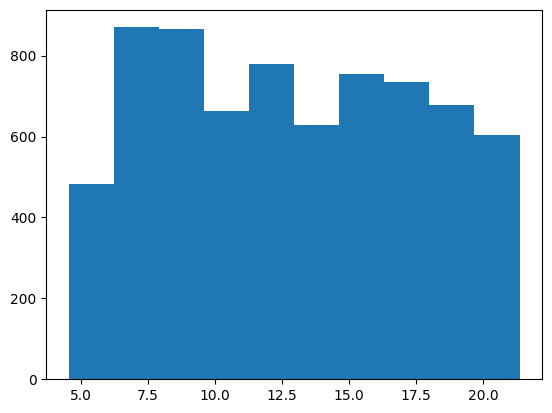

In [245]:
plt.hist(df['Item_Weight'])

In [246]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

  - The data doesn't seem to have outliers, mean and median are close to each other ==> we can just use the mean as a placeholder for the missing values

In [247]:
# df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

6. Missing values after addressing them

In [248]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7. Data Inconsistancy:

In [249]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  print("Value counts for column: ", df[col].value_counts())
  print("\n")

Value counts for column:  Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Value counts for column:  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for column:  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value counts for column:  Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT

Notice that the Item_Fat_Content col has inconsistencies ==> Replace as follows:

In [250]:
replcaments = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replcaments)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [251]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('str')

Outlet establishment year is numeric but it is nominal. So better convert it to string.



8. Summery Statistics:

In [252]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales
count  7060.000000      8523.000000  8523.000000        8523.000000
mean     12.857645         0.066132   140.992782        2181.288914
std       4.643456         0.051598    62.275067        1706.499616
min       4.555000         0.000000    31.290000          33.290000
25%       8.773750         0.026989    93.826500         834.247400
50%      12.600000         0.053931   143.012800        1794.331000
75%      16.850000         0.094585   185.643700        3101.296400
max      21.350000         0.328391   266.888400       13086.964800

## Exploratory Data Analysis

In [253]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                      1999      Medium               Tier 1   
1                      2009      Medium               Tier 3   
2                      1999      Medium               Tier 1   
3                      1998         NaN               Tier 3   
4                      1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

### Univariate Visualization

#### How are the Item Outlet Sales distributed? What is the range of values in this dataset?


<Axes: ylabel='Item_Outlet_Sales'>

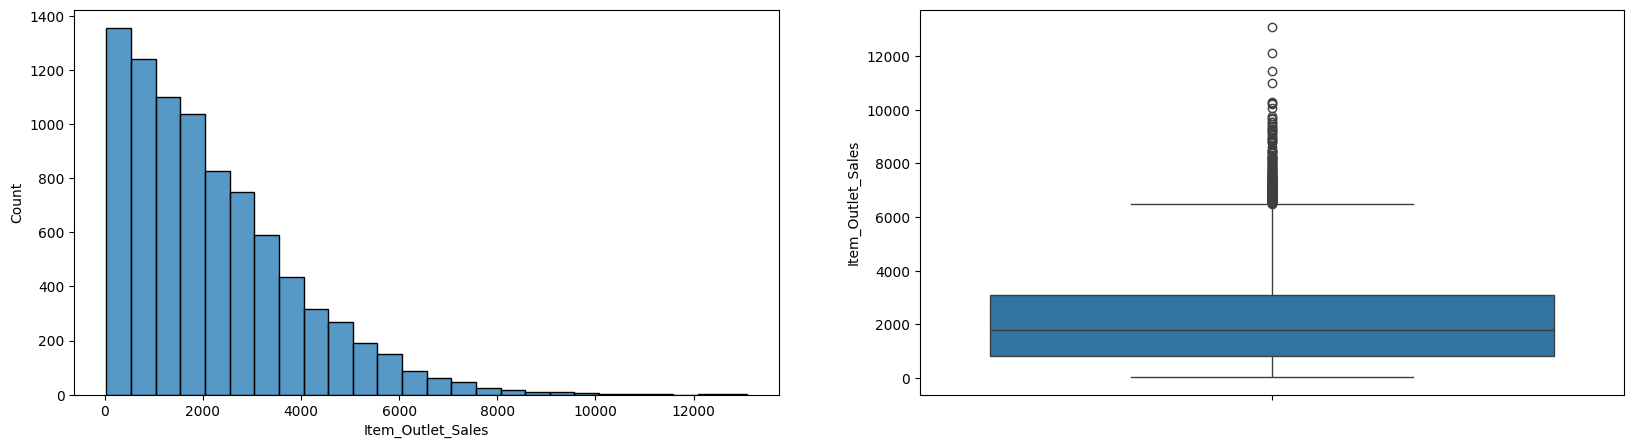

In [254]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

sns.histplot(df['Item_Outlet_Sales'], binwidth=500, ax=axs[0])
sns.boxplot(df['Item_Outlet_Sales'], ax=axs[1])

  - Item Outlet Sales values are ranging from 30 to 13,000 .
  - The distribution is right-skewed meaning that a large number of products have low to medium sales, while a small number of items have very high sales. This pattern suggests that high sales are more concentrated among a few products or outlets.
  - The median of Item Sales is less than 2000, meaning half of the items have achieved sales less than 2000.
  - There are some items that have achieved extreme values of sales going up to 13000.
  

####How are the Item Maximum Retail Prices (MRP) distributed? What is the range of values in this dataset?

<Axes: ylabel='Item_MRP'>

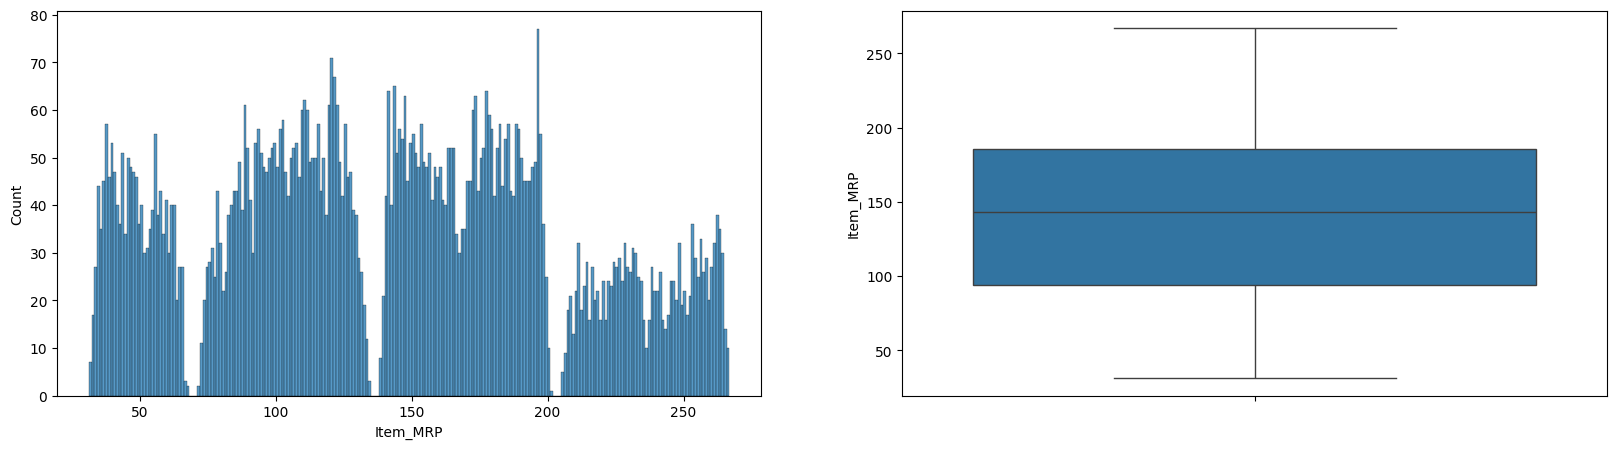

In [255]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

sns.histplot(df['Item_MRP'], binwidth=1, ax=axs[0])
sns.boxplot(df['Item_MRP'], ax=axs[1])

In [256]:
df['MRP_Category'] = pd.cut(df['Item_MRP'], bins=[0, 70, 135, 205, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
df['MRP_Category'].value_counts()

MRP_Category
High         3003
Medium       2751
Very High    1428
Low          1341
Name: count, dtype: int64

  - The MRP (Maximum Retail Price) shows a somewhat uniform distribution, with prices ranging widely between 30 and 270 units, which indicates that items are spread across the full spectrum of pricing the range.
  - There seem to be an obvious segmentation in the distribution, which can imply that there are 4 price ranges for the selled goods:
    1. ***Low Priced Items:***
      
      With prices less than 70.

    2. ***Medium Priced Items:***

      With prices between 70 and 135.

    3. ***High Priced Items:***

      With prices between 135 and 205.

    4. ***Very High Priced Items:***

      With prices greater than 205.

  - Most of the items have medium or high prices:
    - 2751 medium priced items  
    - 3003 high priced items
  - Less items have low and very high prices:
    - 1341 low priced items
    - 1428 high priced items


#### What items types does this dataset contain sales for?

<ipython-input-257-92d76d11182d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


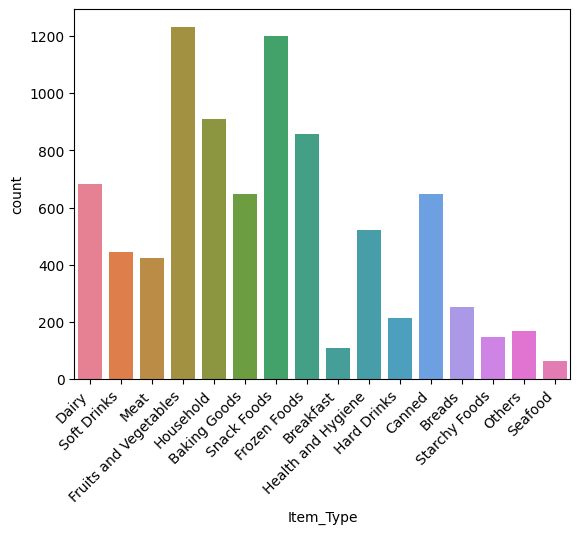

In [257]:
ax = sns.countplot(data=df, x='Item_Type', hue='Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

The dataset provides the largest number of detailed sales information across different outlets on these categories:
  - Fruits and vegetables
  - Snack Foods
  - House Hold
  - Frozen Foods

The dataset provides less number of detailed sales information across different outlets on these categories:
  - Breakfast
  - Seafood
  - Startchy Foods

### Multivariate Visualization


####Is there a clear correlation between the numerical features in the dataset?

<Axes: >

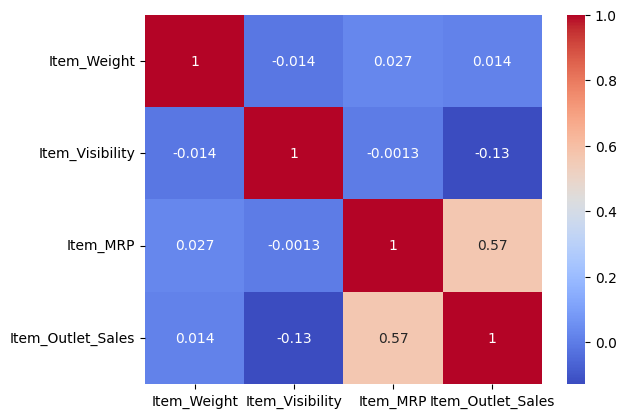

In [258]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

The heat map shows only one positive strong relationship with a 0.57 correlation coeffeicient between the Item MRP and the Item Outlet Sales.
In other words, when the MRP increase, the Item Outlet Sales increases too.

#### How does the Item MRP influence the Item Outlet Sales across the four different price groups identified earlier?

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

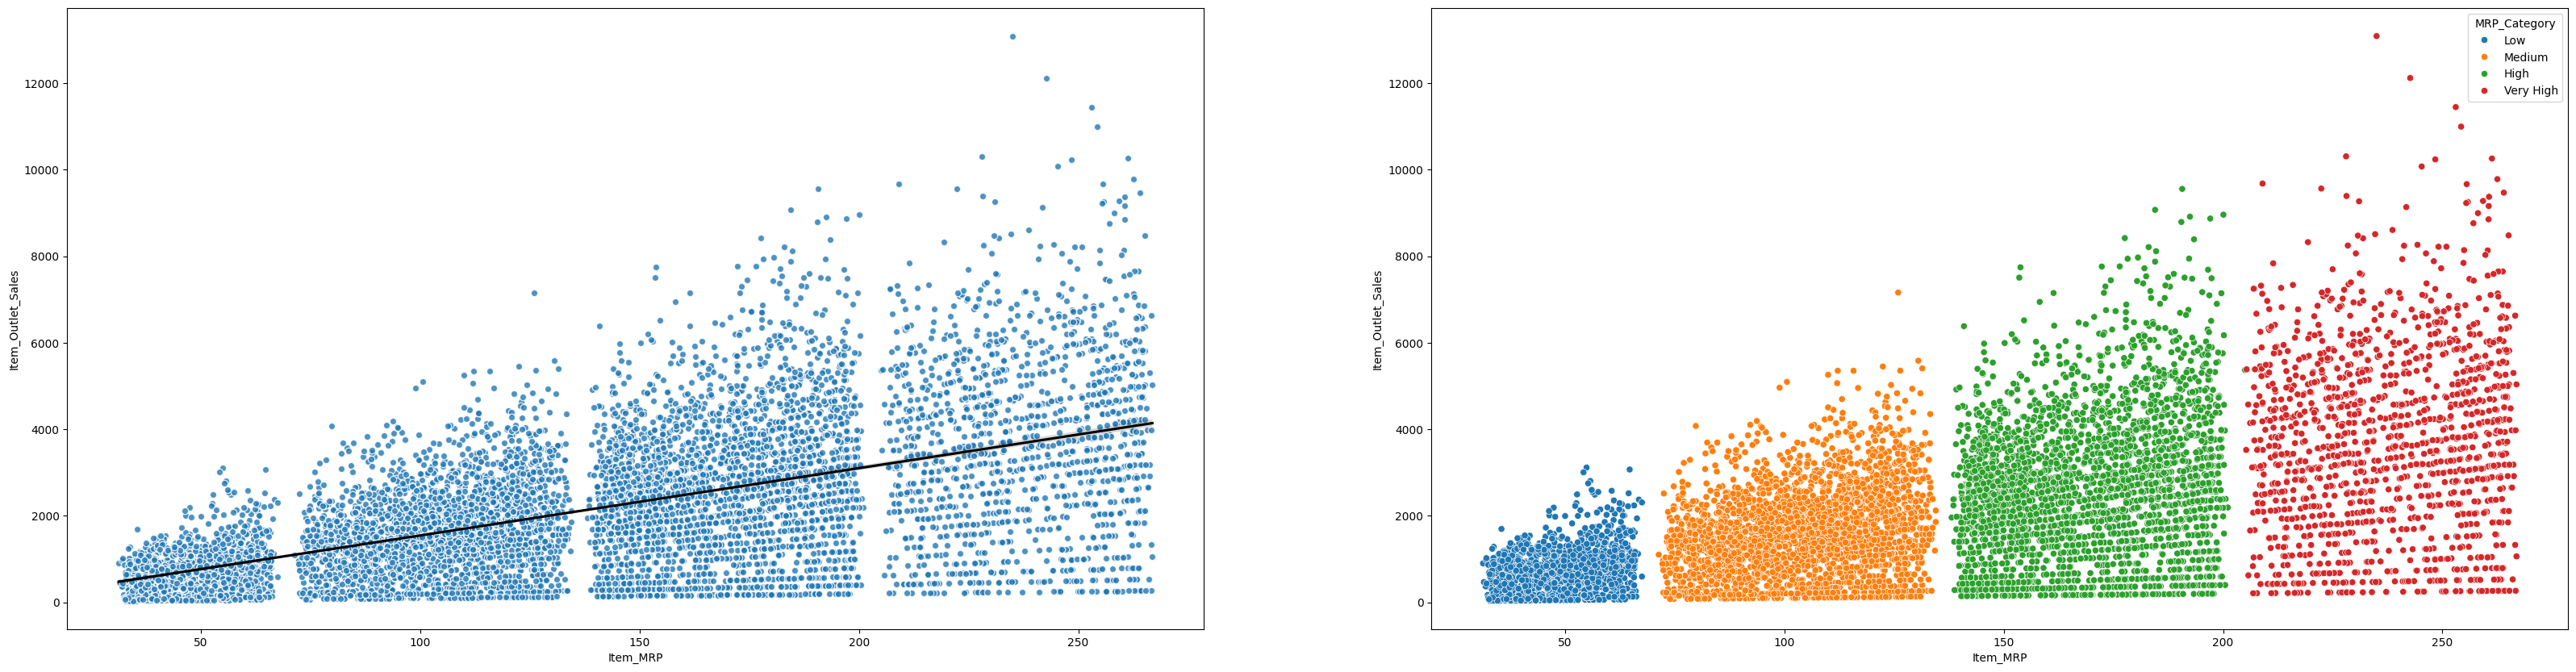

In [259]:
fig, axs = plt.subplots(ncols=2, figsize=(40, 10))
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', line_kws=lkws, scatter_kws=rkws, ax=axs[0])
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', edgecolor='w', hue='MRP_Category', ax=axs[1])


In [260]:
df.groupby('MRP_Category')['Item_Outlet_Sales'].agg(['mean', 'sum', 'min', 'max'])

<ipython-input-260-7c4b0cd571e9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MRP_Category')['Item_Outlet_Sales'].agg(['mean', 'sum', 'min', 'max'])


mean           sum       min         max
MRP_Category                                                 
Low            736.474596  9.876124e+05   33.2900   3112.6150
Medium        1615.644414  4.444638e+06   73.2380   7158.6816
High          2632.137093  7.904308e+06  139.8180   9554.2300
Very High     3679.669120  5.254568e+06  207.0638  13086.9648

As said, when Item_MRP increase, the Item_Outlet_Sales increase:
  - As the retail price increases, sales also tend to rise. **Lower-priced** items are generating less total sales as the **higher-priced** ones.
  - The data appears to split into four groups, suggesting that the previousely mentioned pricing intervals are affecting the Item Outlet Sales:
    1. ***Low Price items have:***
      - The lowest average sales (~736)
      - Lowest Total sales of 987,612
    2. ***Medium Price items have:***
      - Higher average sales (~1615)
      - Total sales of 4,444,637
    3. ***High Price items show:***
      - More significant sales (~2632)
      - Highest Total sales of 7,904,307
    4. ***Very High Price items have:***
      - The highest average sales (~3679)
      - Total sales of 5,254,567
  - **Very high-priced** items, despite the fact that they are a smaller set than other groups like the medium and high price items, they have achieved the maximum average of sales across all of the groups. That could be due to multiple possible reasons, maybe some expensive items are heavily marketed or backed by strong a brand, making them more desirable. Or maybe the fact that higer prices often imply better quality.

  - **High-priced** items achieved the highest total sales among all groups. However, **very high-priced** items may not have performed as well, possibly due to their extreme prices reaching up to 13,000, which could make them less accessible to a broader customer base.


  To understand exactly why higher-priced items outperform cheaper ones in total sales, it is important to understand the customer demographics, item features and  market positioning.

####Within the pricing groups, what does the distribution look like for each one, and are there any notable patterns or variations?

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

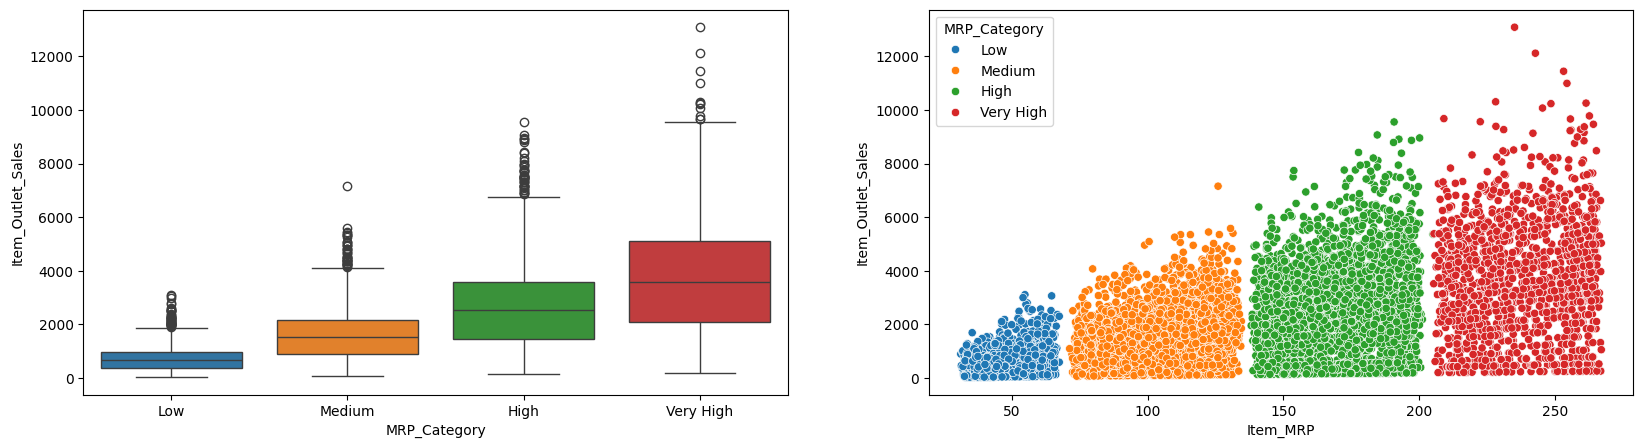

In [261]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))

sns.boxplot(data=df, y='Item_Outlet_Sales', x='MRP_Category', hue='MRP_Category', ax=axs[0])
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', edgecolor='w', hue='MRP_Category', ax=axs[1])


The interquartile range (IQR) of sales is largest for the **very high-priced** group, followed by the **high**, **medium**, and **low-priced** groups, respectively. Additionally, the outliers in the **very high-priced** group are more spread compared to those in the high, medium, and low price groups.

In other words, as we move higher within the groups, the range of the group prices increase.

####How do Outlet Type, Size, and Location Type influence the value of Item Outlet Sales?

<ipython-input-262-17ccdaf19e9d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

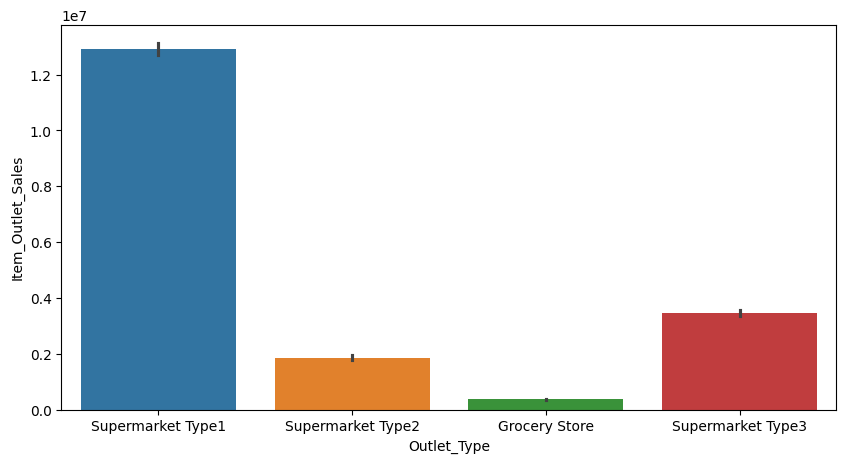

In [262]:
fig, axs = plt.subplots(figsize=(10, 5))

axs = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Type', estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

<ipython-input-263-8e35894d1259>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-263-8e35894d1259>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-263-8e35894d1259>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


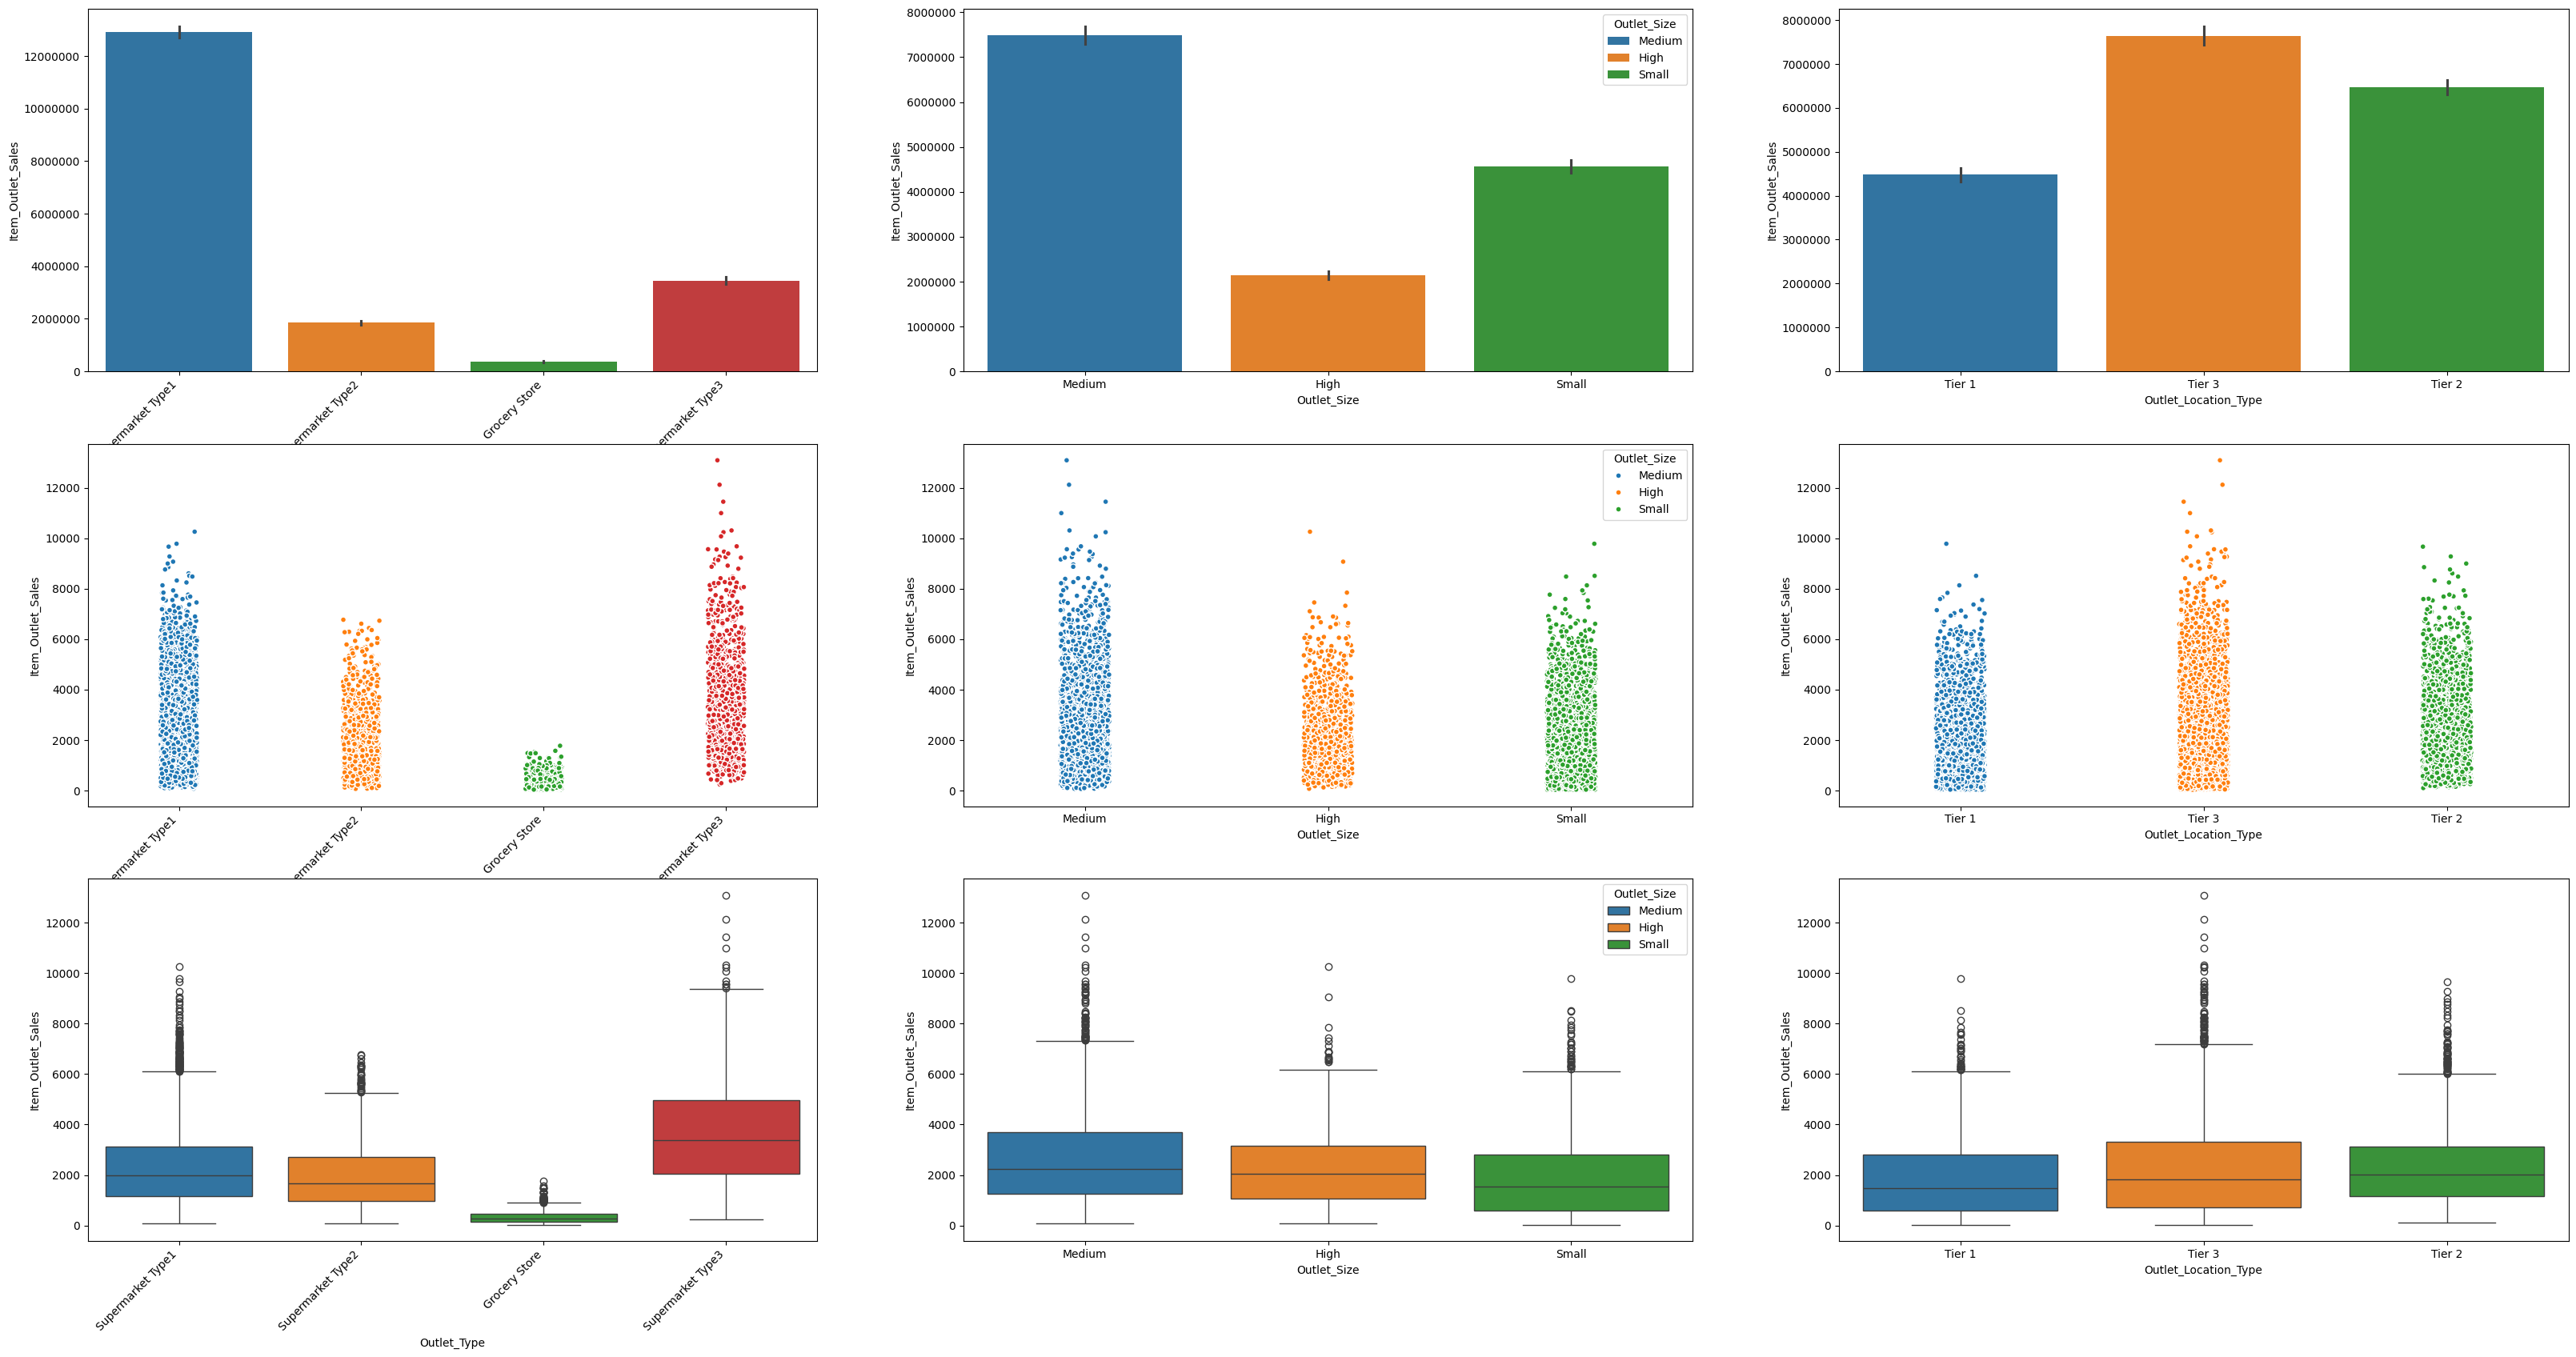

In [263]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(40, 20))

ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Type',  ax=axs[0][0], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size',  ax=axs[0][1], estimator=sum)
sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ax=axs[0][2], estimator=sum)

ax = sns.stripplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Type', edgecolor='w', linewidth=1, ax=axs[1][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.stripplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', edgecolor='w', linewidth=1, ax=axs[1][1])
sns.stripplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', edgecolor='w', linewidth=1, ax=axs[1][2])

ax = sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Type', ax=axs[2][0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axs[2][1])
sns.boxplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ax=axs[2][2])

axs[0][0].ticklabel_format(style='plain', axis='y')
axs[0][1].ticklabel_format(style='plain', axis='y')
axs[0][2].ticklabel_format(style='plain', axis='y')


  - ***Outlet Type vs Outlet Item Sales:***
      - The bar plot reveals that items sold in **Supermarket Type1** have the highest total Item Outlet Sales, exceding **12 Million**, followed by **Supermarket Type3** at approximately **3M**, and **Supermarket Type2** at **2M**. In contrast, **Grocery Stores** show a significantly lower total sales barely reaching **250 Thousand**.
      - The strip plot illustrates the distribution of actual sales across each outlet type, with **Supermarket Type 3** reaching a maximum value exceeding **13,000**.
  - ***Outlet Size vs Outlet Item Sales:***
      - The bar plot shows that **medium-sized** outlets achieve the highest total Item Outlet Sales, exceeding **7.5M**, followed by **small** outlets at around **4M**, while **large** outlets have total sales around **2M**.
      - The strip plot illustrates the distribution of actual sales across each outlet size, with **medium** outlets reaching a maximum sales value exceeding **12,000**.
  - ***Outlet Location Type vs Outlet Item Sales:***
      - The bar plot indicates that outlet located in **Tier3** have the highest total Item Outlet Sales, around **7.5M**, followed by **Tier2** slightly exceding **6M**. Then **Tier1** outlets, with total sales around **4.5M**.
      - The strip plot shows the distribution of actual sales across each outlet location type, revealing that **Tier3** has the highest actual sales reaching up to more than **12,000**, the opposite of what might be assumed from the bar plot. This is followed by **Tier2** and **Tier1**.


  

Until now it looks like **Supermarket Type 1**, **Medium-Sized** stores, and outlets located in **Tier 3** consistently show the highest total Item Outlet Sales.

####How do outlet size and outlet location type affect sales within the same outlet type?

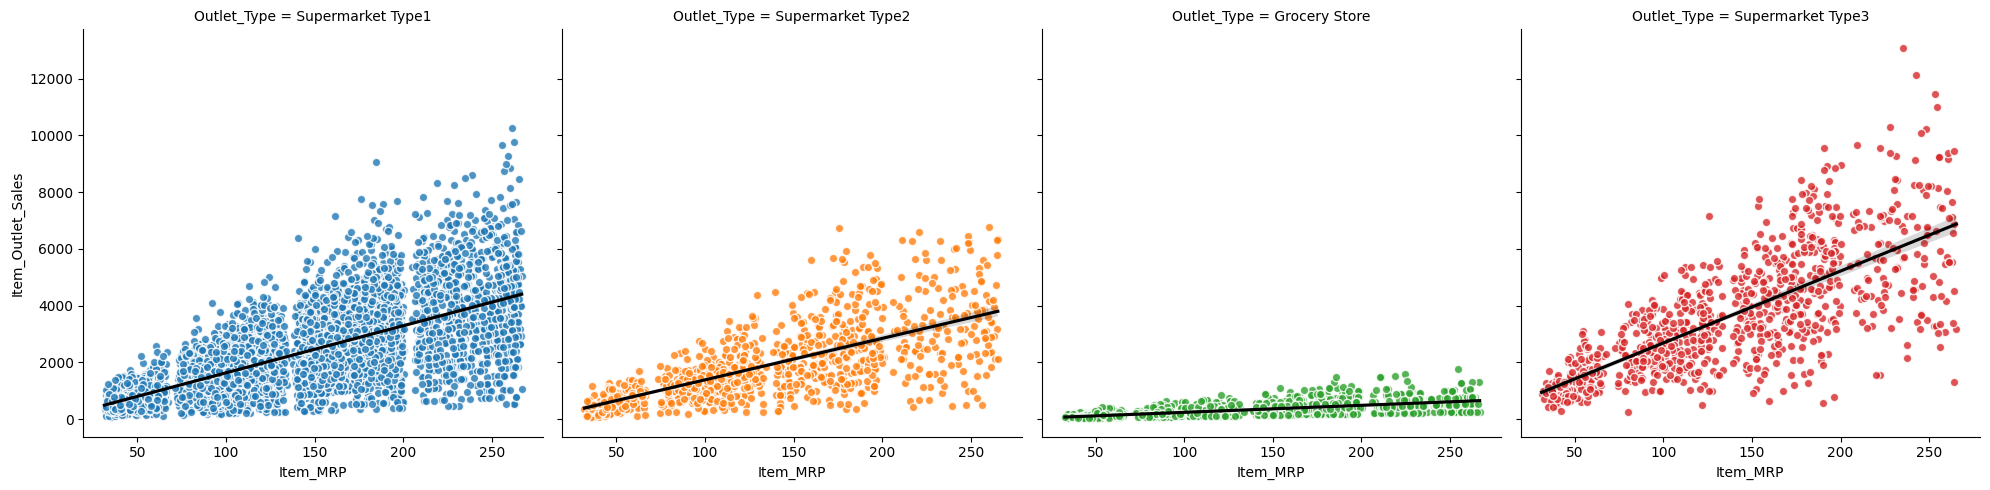

In [264]:
fg = sns.lmplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', col= 'Outlet_Type', line_kws=lkws, scatter_kws=rkws)

After exploring the **MRP** relationship with the **Item Outlet Sales**, with hue as the **Outlet Type** it shows that in *grocery stores* there seem to be a very week correlation between the **MRP** and **Item Outlet Sales**. So to explore that relationship more, excluding the data for grocery stores might simplify things as follows.
**Will it help, or will it be wrong?**

In [265]:
# slice out the data for all types of outlets other than grocery stores
df_not_gc = df[df['Outlet_Type'] != 'Grocery Store']
df_not_gc['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<ipython-input-266-72923e69400d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-266-72923e69400d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


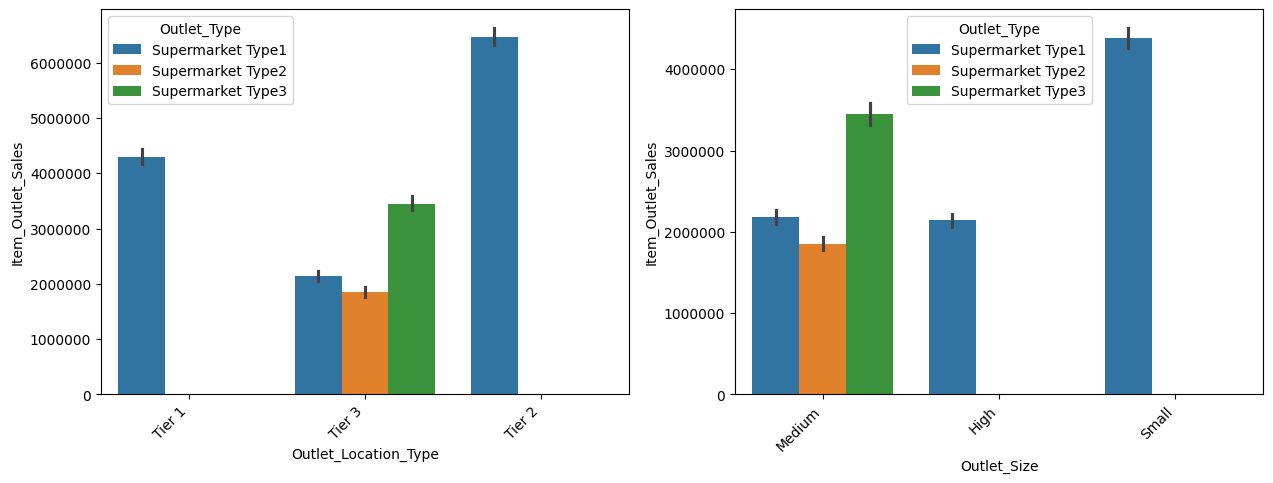

In [266]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.barplot(data=df_not_gc, hue='Outlet_Type', y='Item_Outlet_Sales', x='Outlet_Location_Type', ax=axs[0], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax = sns.barplot(data=df_not_gc, hue='Outlet_Type', y='Item_Outlet_Sales', x='Outlet_Size', ax=axs[1], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')

  - ***Outlet Location Type with Item Outlet Sales( Outlet Type as hue):***
    - The barplot shows that within **Tier3** locations, **Supermarket Type3** have achieved the highest total sales, reaching to more than **3M** out of the **7.5M** total sales of **Tier3**


  - ***Outlet Size with Item Outlet Sales( Outlet Type as hue):***  
    - The barplot shows that within **medium-sized** outlets,**Supermarket Type3** have achieved the highest total sales, raround **3.5M** out of the **7.5M** total sales of **Tier3**

    - In contrast, **high** and **small-sized** outlets primarily have **Supermarket Type1** outlets with similar average sales.
  
Let us look at it from a different angle!



<ipython-input-267-e65c15721739>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-267-e65c15721739>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-267-e65c15721739>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


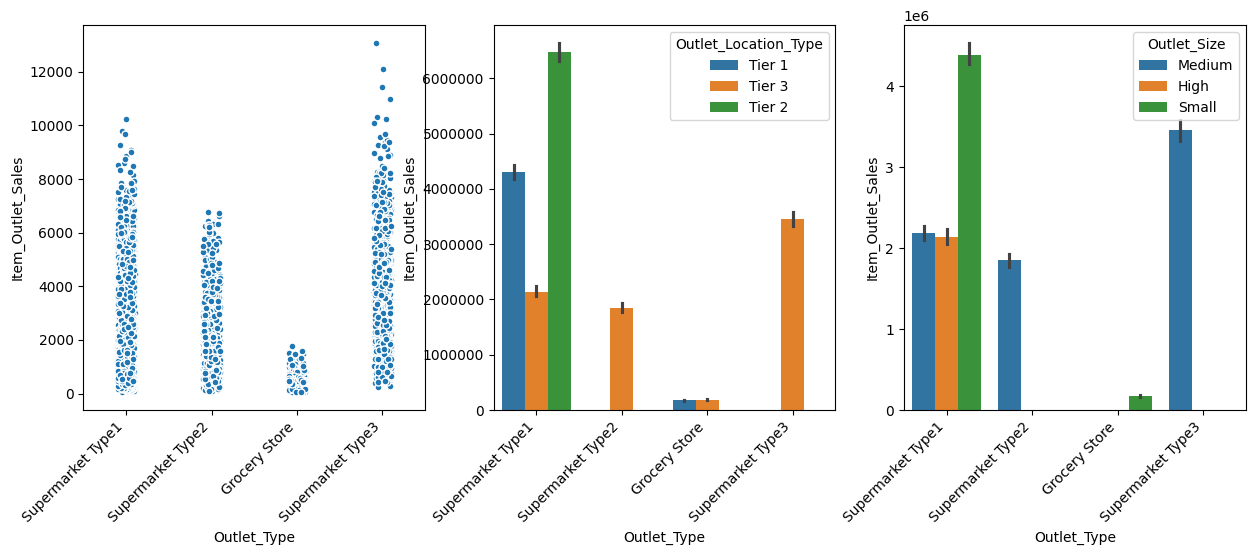

In [267]:
fig, axs = plt.subplots(ncols=3,  figsize=(15, 5))

ax = sns.stripplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', edgecolor='white', linewidth=1, ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ax=axs[1], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axs[2], estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')

  - Within the same Outlet type, such as Grocery Stores and Supermarket Type 1, the average sales across different **location types** *(Tier 1, Tier 2, Tier 3)* **and** across **outlet sizes** *(small, medium, high)*  are relatively consistent.
  

This suggests that neither **Outlet Location Type** nor **Outlet Size** impact average sales within the same outlet type.

This might also apply accross all the data, but because there is no variety of *outlet location types* or *outlet sizes* in supermarkets of **Type2** and **Type3**.


####Which **item types** that are achieving the highest and lowest total sales?

In [268]:
df_it = df.groupby('Item_Type')['Item_Outlet_Sales'].agg(['sum', 'mean', 'min', 'max'])
df_it = df_it.sort_values(by='sum', ascending=False)
df_it

sum         mean       min         max
Item_Type                                                             
Fruits and Vegetables  2.820060e+06  2289.009592   45.2744  12117.5600
Snack Foods            2.732786e+06  2277.321739   33.9558  10993.6896
Household              2.055494e+06  2258.784300   33.2900  13086.9648
Frozen Foods           1.825735e+06  2132.867744   36.6190   9678.0688
Dairy                  1.522594e+06  2232.542597   40.6138  10256.6490
Canned                 1.444151e+06  2225.194904   37.9506  10306.5840
Baking Goods           1.265525e+06  1952.971207   37.2848   7931.6754
Health and Hygiene     1.045200e+06  2010.000265   34.6216   9779.9362
Meat                   9.175656e+05  2158.977911   47.9376   9390.4432
Soft Drinks            8.928977e+05  2006.511735   33.2900   9554.2300
Breads                 5.532372e+05  2204.132226   35.2874   8958.3390
Hard Drinks            4.577934e+05  2139.221622   37.9506   7843.1240
Starchy Foods          3.514013e+05  2374.332773   58.5904   8132.0812
Others                 3.255176e+05  1926.139702   39.9480   6008.8450
Breakfast              2.322990e+05  2111.808651   39.9480   8209.3140
Seafood                1.488682e+05  2326.065928  149.8050   6503.5344

<ipython-input-269-b8982223d827>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


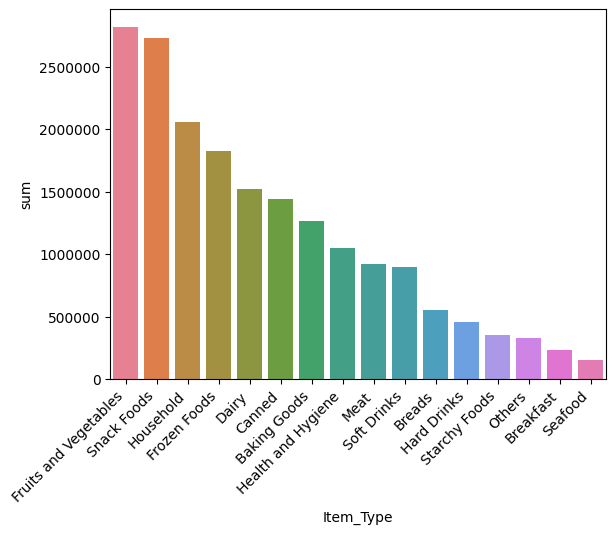

In [269]:
ax = sns.barplot(data= df_it, x=df_it.index, y='sum', hue=df_it.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.ticklabel_format(style='plain', axis='y')

The item types that are achieving the highest total sales are:
  - Fruits and vegetables
  - Snack Foods
  - House Hold
  - Frozen Foods

The item types that are achieving the lowest total sales are:
  - Breakfast
  - Seafood
  - Others

####Which items are achieving the highest and lowest total sales?

In [270]:
df_id = df.groupby('Item_Identifier')['Item_Outlet_Sales'].agg(['sum', 'mean', 'min', 'max'])
df_id = df_id.sort_values(by='sum', ascending=False)
df_id

sum         mean        min         max
Item_Identifier                                                
FDY55            42661.8008  5332.725100   256.9988   9251.9568
FDA15            41584.5364  5198.067050   498.0184   6474.2392
FDZ20            40185.0248  5023.128100   508.6712  11445.1020
FDF05            36555.7490  4569.468625  3418.8830   5522.8110
FDA04            35741.4756  4467.684450  2330.9658   5697.9164
...                     ...          ...        ...         ...
FDQ04              784.3124   261.437467    41.2796    701.7532
FDF38              771.6622   385.831100   365.5242    406.1380
FDY43              673.7896   673.789600   673.7896    673.7896
NCR42              332.9000   110.966667    33.2900    199.7400
FDQ60              120.5098   120.509800   120.5098    120.5098

[1559 rows x 4 columns]

<Axes: xlabel='Item_Identifier', ylabel='sum'>

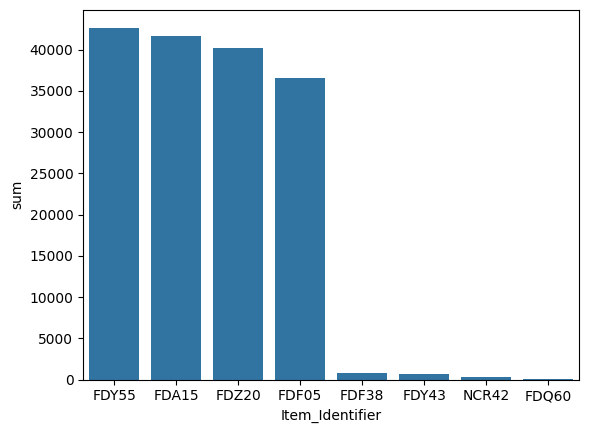

In [271]:
hi_lo = pd.concat([df_id.head(4), df_id.tail(4)])
sns.barplot(data= hi_lo, x=hi_lo.index, y='sum')

In [272]:
print("The items that are achieving the highest total sales are:")
for id in df_id.head(4).index:
  print("Id: ", id, ", Type: ", df[df['Item_Identifier'] == id]['Item_Type'].values[0])

print("\nThe items that are achieving the lowest total sales are:")
for id in df_id.tail(4).index:
  print("Id: ", id, ", Type: ", df[df['Item_Identifier'] == id]['Item_Type'].values[0])

The items that are achieving the highest total sales are:
Id:  FDY55 , Type:  Fruits and Vegetables
Id:  FDA15 , Type:  Dairy
Id:  FDZ20 , Type:  Fruits and Vegetables
Id:  FDF05 , Type:  Frozen Foods

The items that are achieving the lowest total sales are:
Id:  FDF38 , Type:  Canned
Id:  FDY43 , Type:  Fruits and Vegetables
Id:  NCR42 , Type:  Household
Id:  FDQ60 , Type:  Baking Goods


The items that are achieving the highest total sales are:
  - Id:  FDY55 , Type:  Fruits and Vegetables
  - Id:  FDA15 , Type:  Dairy
  - Id:  FDZ20 , Type:  Fruits and Vegetables
  - Id:  FDF05 , Type:  Frozen Foods

The items that are achieving the lowest total sales are:
  - Id:  FDF38 , Type:  Canned
  - Id:  FDY43 , Type:  Fruits and Vegetables
  - Id:  NCR42 , Type:  Household
  - Id:  FDQ60 , Type:  Baking Goods

####Does the year an outlet was established have an impact on its total sales?

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

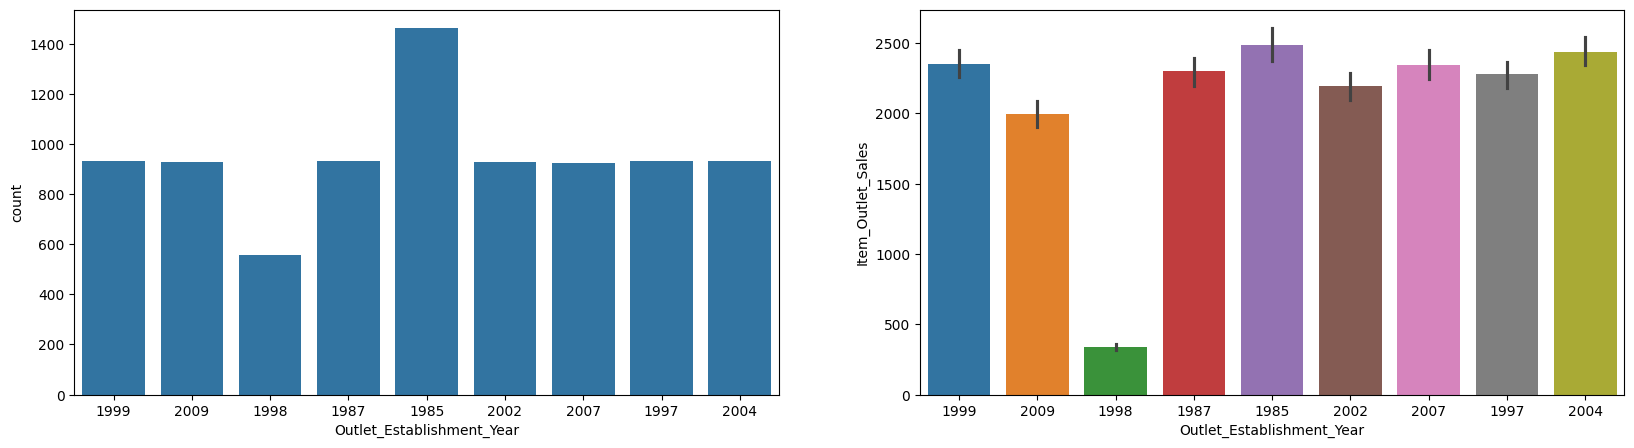

In [273]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(data=df, x='Outlet_Establishment_Year', ax=axs[0])
sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Establishment_Year', ax=axs[1])

Outlets in the dataset were established between 1999 and 2004. The data indicates that average sales for outlets established in most of these years are similar, with the exception of 1998. This discrepancy could be due to a lower volume of data for outlets built in 1998 compared to other years, as illustrated in the count plot. This limited data availability might skew the average sales figures for that year.

####How does the Item_Visibility affect the Item Sales? Does it make a difference in different price groups?

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

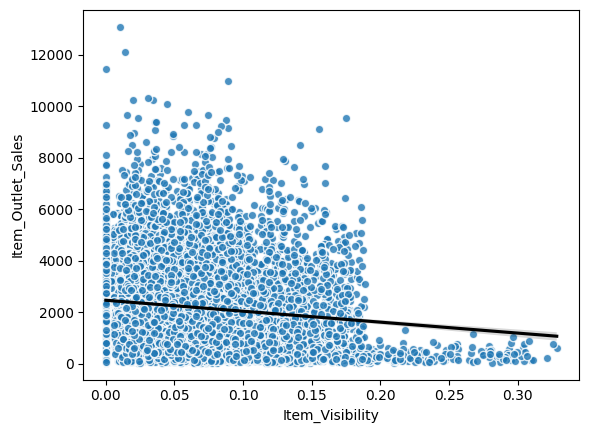

In [274]:
sns.regplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', line_kws=lkws, scatter_kws=rkws)

According to the heat map, the visibility and sales coefficient of -0.13, and this scatter plot it indicates a very weak negative correlation.

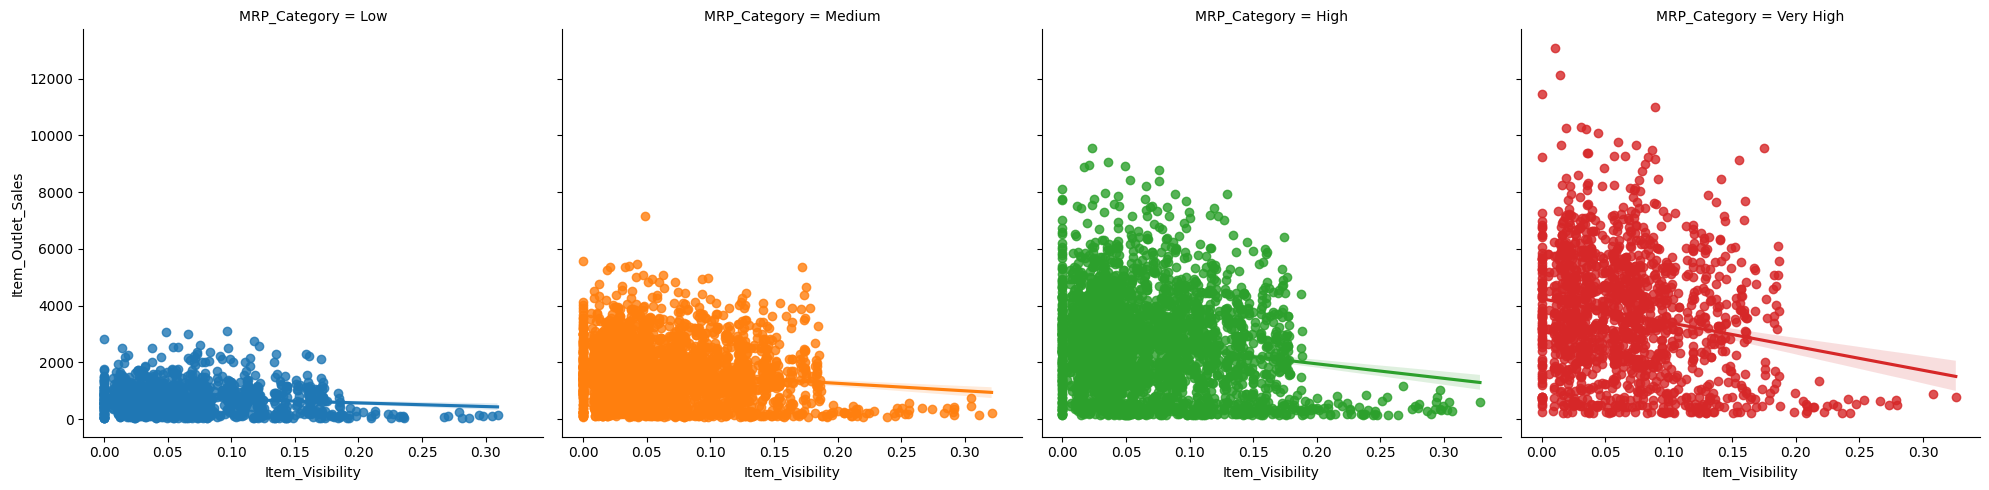

In [275]:
sns.lmplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', col='MRP_Category', hue='MRP_Category')

After segmenting the data according to the predefined price groups, as noticed in the **very high-priced** items, it shows a moderate negative correlation between the item visibility and the sales.

## Feature Inspection

In [276]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
MRP_Category                    0
dtype: int64

In [277]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  print("Value counts for column: ", df[col].value_counts())
  print("\n")

Value counts for column:  Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Value counts for column:  Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Value counts for column:  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value counts for column:  Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018   

In [278]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

### Categorical Features
  1. Item_Identifier
  2. Item_Type
  3. Outlet_Identifier
  4. Outlet_Type

####Item_Identifier
  - Definition: It represents the Product ID
  - Feature Type: Categorical
  - NaN's Found: 0 (0.0%)
  - Unique Values: 1559
  - Cardinality: High
  - Most common value: 'FDW13' occurs 10 times (0.12%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Yes.
  - Is there a business case/understanding reason to exclude based on our business case?
    - Yes, the feature is not determined by the sellers,  but may help predect the item sales
    - Very high cardinality, problematic for modeling.


<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


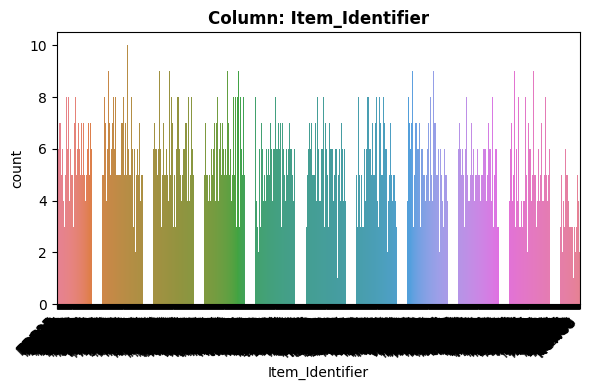

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Cardinality: High
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [279]:
fig, ax = explore_categorical(df, 'Item_Identifier')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

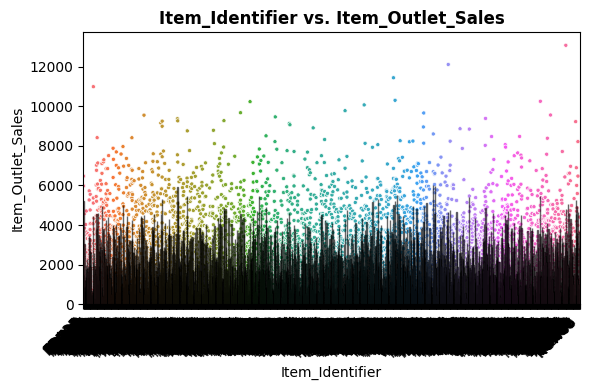

In [280]:
plot_categorical_vs_target(df, 'Item_Identifier')

  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, if we know the item id we can get a sense of how much total sales it might achieve across stores
  - Does this feature appear to be a predictor of the target?
    - Yes there is variability of sales across item ids.



####Item_Type
  - 	Definition: The category to which the product belongs.
  - Feature Type: Categorical
  - NaN's Found: 0 (0.0%)
  - Unique Values: 16
  - Cardinality: High
  - Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


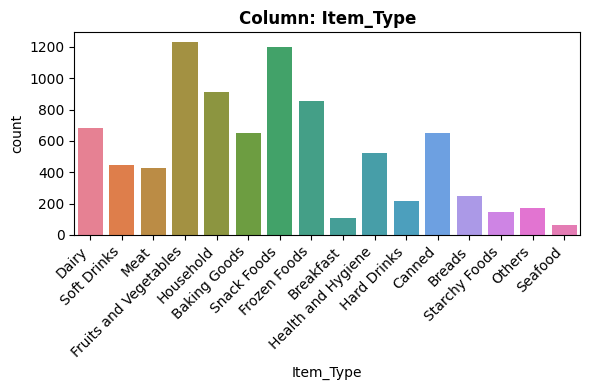

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Cardinality: High
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [281]:
fig, ax = explore_categorical(df, 'Item_Type')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


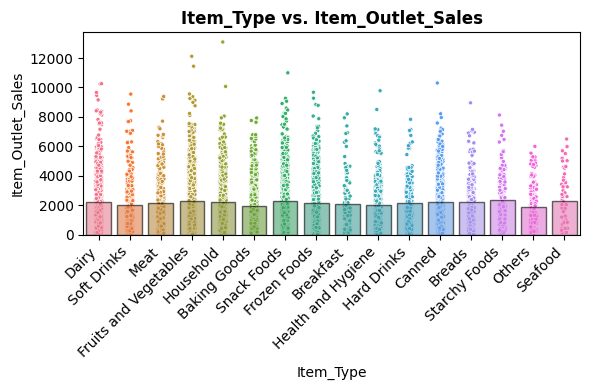

In [282]:
fig, ax = plot_categorical_vs_target(df, 'Item_Type')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


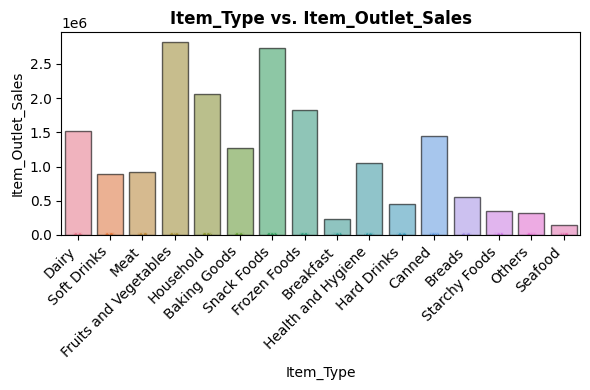

In [283]:
fig, ax = plot_categorical_vs_target(df, 'Item_Type', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expect some types of items might ahcieve more sales than others.
- Does this feature appear to be a predictor of the target?
  - Yes.
  - In terms of the sales means, it shows slight variability.
  - In terms of the total sales it shows more obvious variability.


####Outlet_Identifier
  - Store ID
  - Feature Type: Categorical
  - NaN's Found: 0 (0.0%)
  - Unique Values: 10
  - Cardinality: High
  - Most common value: 'OUT027' occurs 935 times (10.97%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Yes.
  - Is there a business case/understanding reason to exclude based on our business case?
    - No. Although it is a high cardinality feature.

<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


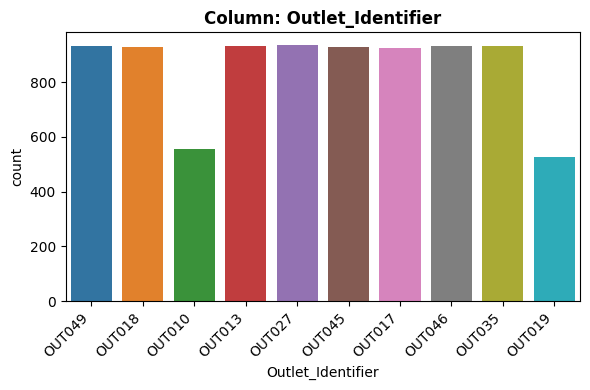

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Cardinality: High
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [284]:
fig, ax = explore_categorical(df, 'Outlet_Identifier')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


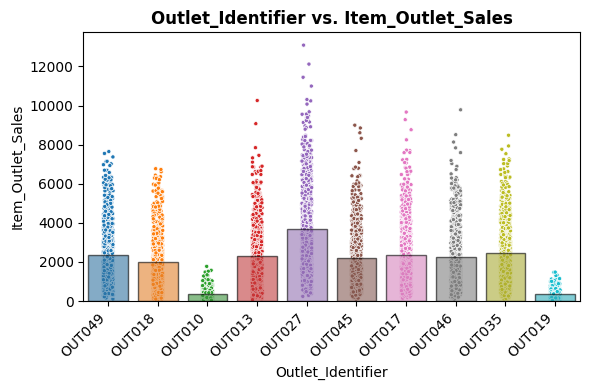

In [285]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Identifier')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


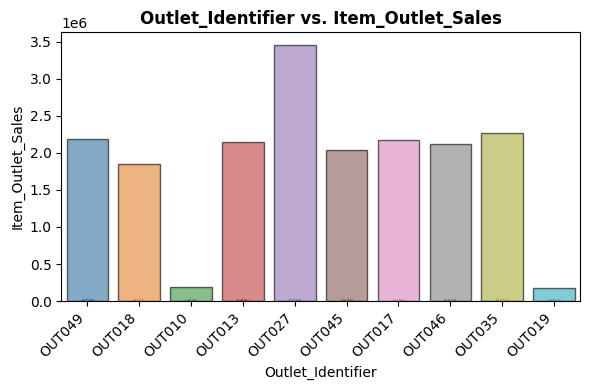

In [286]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Identifier', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expect different outlets to have different customer base and different reputation wich can affect the outlet total sales.
- Does this feature appear to be a predictor of the target?
  - Yes, the plots show total sales variability between categories.

####Outlet_Type
  - Definition: Whether the outlet is a grocery store or some sort of supermarket.
  - Feature Type: Categorical
  - NaN's Found: 0 (0.0%)
  - Unique Values: 4
  - Cardinality: Low
  - Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No

<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


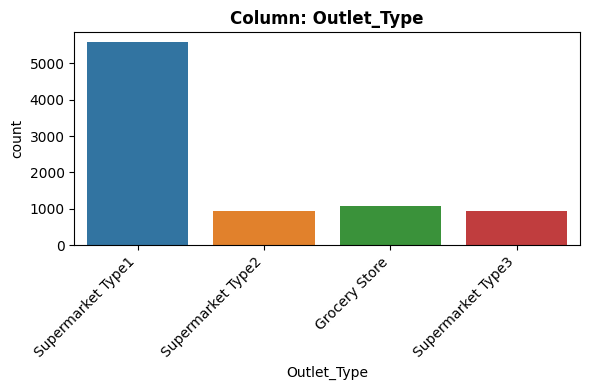

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Cardinality: Low
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [287]:
fig, ax = explore_categorical(df, 'Outlet_Type')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


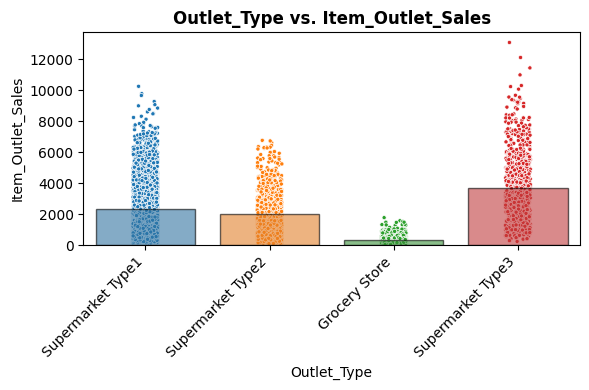

In [288]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Type')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


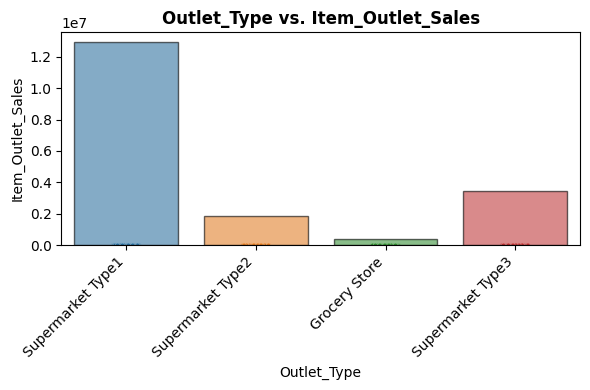

In [289]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Type', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, outlet type might affect sales for the items and the outlet itself
- Does this feature appear to be a predictor of the target?
  - Yes, the plots show sales variability between categories.


### Ordinal Features
  1. Outlet_Size
  2. Outlet_Location_Type
  3. Item_Fat_Content
  4. Outlet_Establishment_Year

####Outlet_Size
  - Definition: The size of the store in terms of ground area covered.
  - Feature Type: Ordinal
  - NaN's Found: 2410 (28.28%)
  - Unique Values: 4
  - Cardinality: Low
  - Most common value: 'Medium' occurs 2793 times (32.77%)
  - Not constant or quasi-constant.
  - What would you do with the null values?
    - Impute with 'MISSING
  - Would we know this feature before the target is determined?
    - Maybe.
  - Is there a business case/understanding reason to exclude based on our business case?
    - No


<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


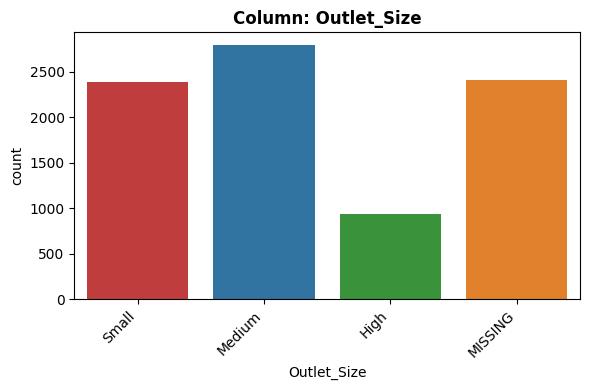

- Feature Type: Ordinal
- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Cardinality: Low
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [290]:
order=['Small', 'Medium', 'High', 'MISSING']
fig, ax = explore_categorical(df, 'Outlet_Size', ftype='Ordinal', order=order)

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


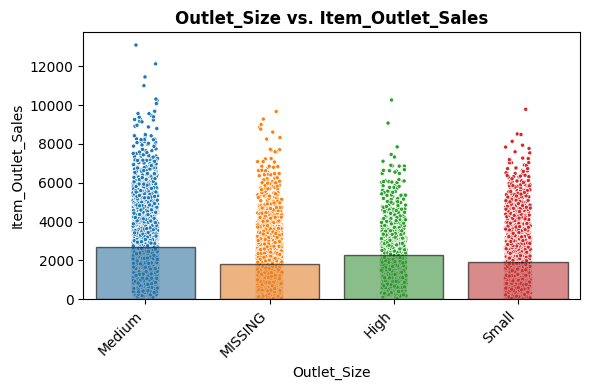

In [291]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Size')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


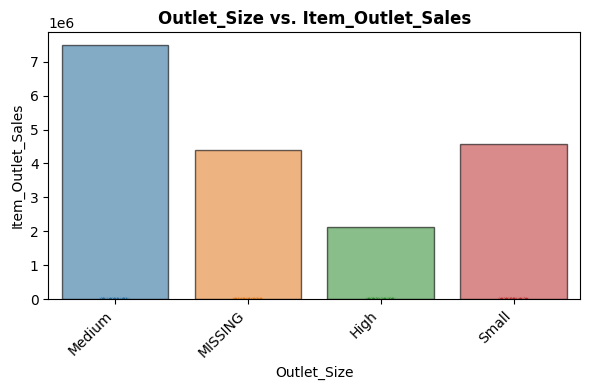

In [292]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Size', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, especially in terms of the total sales


####Outlet_Location_Type
  - Definition: The type of area in which the store is located
  - Feature Type: Ordinal
  - NaN's Found: 0 (0.0%)
  - Unique Values: 3
  - Cardinality: Low
  - Most common value: 'Tier 3' occurs 3350 times (39.31%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Maybe
  - Is there a business case/understanding reason to exclude based on our business case?
    - No



<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


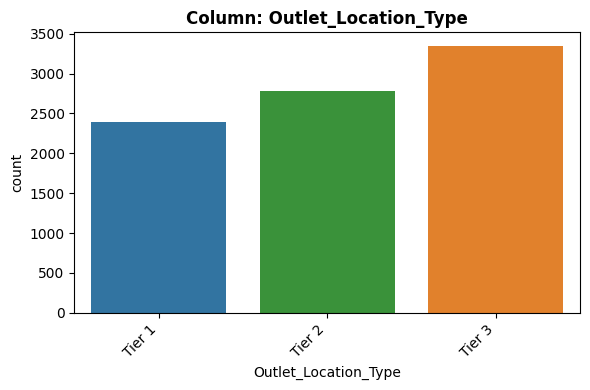

- Feature Type: Ordinal
- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Cardinality: Low
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [293]:
order=['Tier 1', 'Tier 2', 'Tier 3']
fig, ax = explore_categorical(df, 'Outlet_Location_Type', ftype='Ordinal', order=order)

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


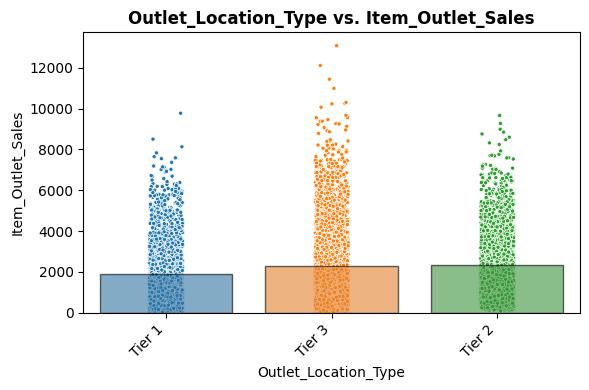

In [294]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Location_Type')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


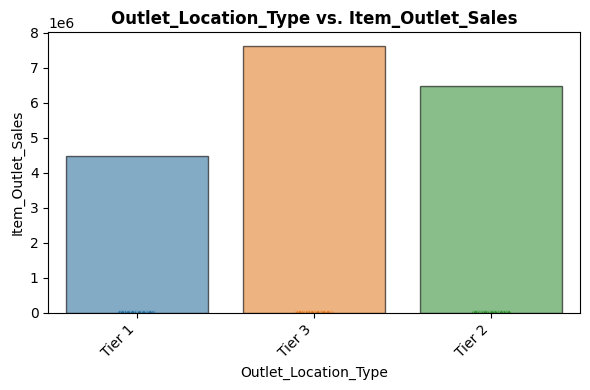

In [295]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Location_Type', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes, especially in terms of the total sales


####Outlet_Establishment_Year
  - Definition: The year in which store was established.
  - Feature Type: Ordinal
  - NaN's Found: 0 (0.0%)
  - Unique Values: 9
  - Cardinality: Low
  - Most common value: '1985' occurs 1463 times (17.17%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Possibly
  - Is there a business case/understanding reason to exclude based on our business case?
    - I do not think this feature is relevant to predect sale prices.


<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


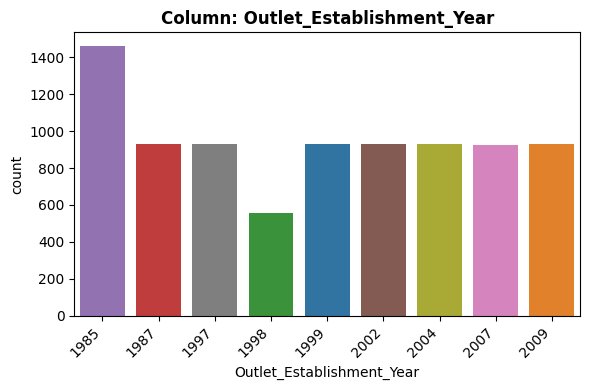

- Feature Type: Ordinal
- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Cardinality: Low
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [296]:
order=['1985', '1987', '1997', '1998', '1999', '2002', '2004', '2007', '2009',]
fig, ax = explore_categorical(df, 'Outlet_Establishment_Year', ftype='Ordinal', order=order)

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


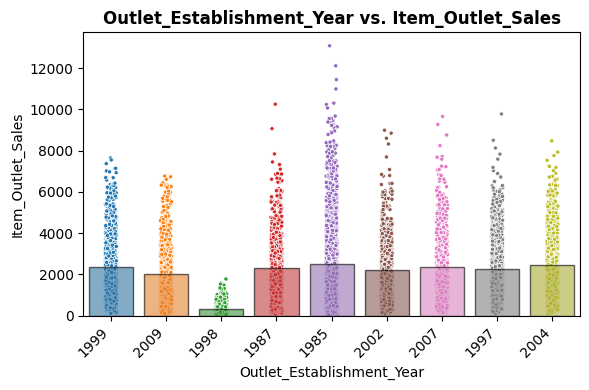

In [297]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Establishment_Year')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


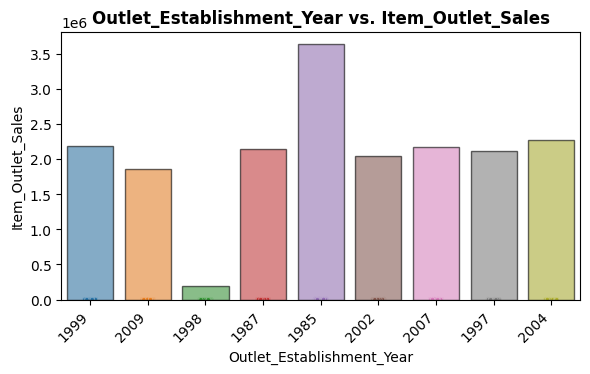

In [298]:
fig, ax = plot_categorical_vs_target(df, 'Outlet_Establishment_Year', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - Not really.

####Item_Fat_Content
  - Definition: Whether the product is low-fat or regular.
  - Feature Type: Categorical
  - NaN's Found: 0 (0.0%)
  - Unique Values: 2
  - Cardinality: Low
  - Most common value: 'Low Fat' occurs 5517 times (64.73%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Maybe
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

<ipython-input-234-034434620714>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


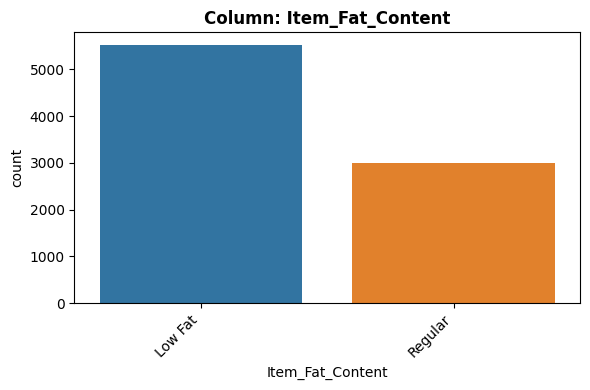

- Feature Type: Categorical
- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Cardinality: Low
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [299]:
order=['Low Fat', 'Regular']
fig, ax = explore_categorical(df, 'Item_Fat_Content', order=order)

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


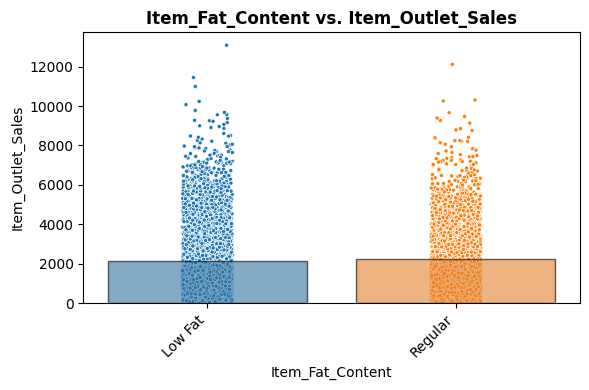

In [300]:
fig, ax = plot_categorical_vs_target(df, 'Item_Fat_Content')

<ipython-input-235-1e91c5c8db94>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


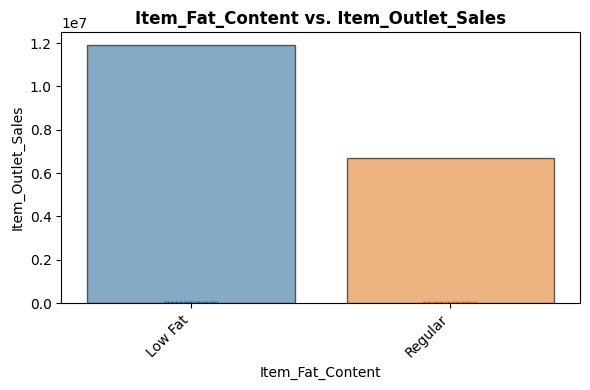

In [301]:
fig, ax = plot_categorical_vs_target(df, 'Item_Fat_Content', estimator=sum)

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - No, in terms of mean sales.
  - Yes in terms of total sales


###Numeric Features
  1. Item_Weight
  2. Item_Visibility
  3. Item_MRP
  4. Item_Outlet_Sales

####Item_Weight
  - Definition: Weight of product
  - Feature Type: Numeric
  - NaN's Found: 1463 (17.17%)
  - Unique Values: 415
  - Most common value: 'nan' occurs 1463 times (17.17%)
  - Not constant or quasi-constant.
  - What would you do with the null values?
    - Impute with the mean.
    - Or with the weight recorded for the same id in other records, and for the rest missing values impute with the mean.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

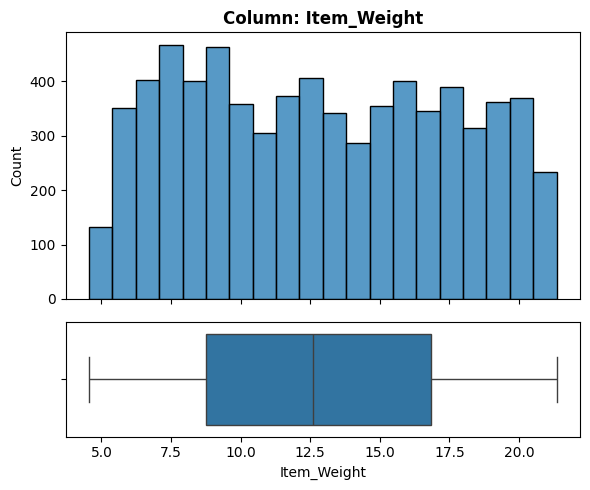

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [302]:
fig, ax = explore_numeric(df, 'Item_Weight')

In [303]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [304]:
filter_null_weight = df['Item_Weight'].isna()
filter_null_weight.sum()

1463

In [305]:
weight_cols = ['Item_Weight', 'Item_Identifier']
check_weight = df[filter_null_weight][weight_cols]
check_weight

Item_Weight Item_Identifier
7             NaN           FDP10
18            NaN           DRI11
21            NaN           FDW12
23            NaN           FDC37
29            NaN           FDC14
...           ...             ...
8485          NaN           DRK37
8487          NaN           DRG13
8488          NaN           NCN14
8490          NaN           FDU44
8504          NaN           NCN18

[1463 rows x 2 columns]

In [306]:
check_weight.isna().sum()

Item_Weight        1463
Item_Identifier       0
dtype: int64

In [307]:
gp = df.groupby('Item_Identifier')['Item_Weight'].mean()
gp[gp.isna()]

Item_Identifier
FDE52   NaN
FDK57   NaN
FDN52   NaN
FDQ60   NaN
Name: Item_Weight, dtype: float64

In [308]:
gp.describe()

count    1555.000000
mean       12.808553
std         4.652088
min         4.555000
25%         8.710000
50%        12.600000
75%        16.750000
max        21.350000
Name: Item_Weight, dtype: float64

In [309]:
gp

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [310]:
df[df['Item_Identifier'] == 'DRA24']['Item_Weight']

1148    19.35
2879      NaN
4130    19.35
4416      NaN
4900    19.35
6863    19.35
8195    19.35
Name: Item_Weight, dtype: float64

In [311]:
for id in gp.index:
  df.loc[df['Item_Identifier'] == id, 'Item_Weight'] = gp[id]

In [312]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
MRP_Category                    0
dtype: int64

In [313]:
df['Item_Weight'].describe()

count    8519.000000
mean       12.875420
std         4.646098
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

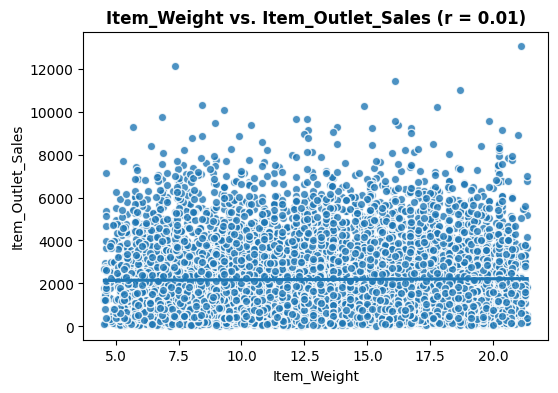

In [314]:
fig, ax = plot_numeric_vs_target(df, 'Item_Weight')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect people to have be affected by the wieght of the item they are buying, which will affect the item sales.
- Does this feature appear to be a predictor of the target?
  - No, there seem to be no relation according to the plot. As it shows a week regression line implying that whenever the item weight change, the item outlet sales stay around the same value.


####Item_Visibility
  - Definition: The percentage of total display area of all products in a store allocated to the particular product.
  - Feature Type: Numeric
  - NaN's Found: 0 (0.0%)
  - Unique Values: 7880
  - Most common value: '0.0' occurs 526 times (6.17%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No.

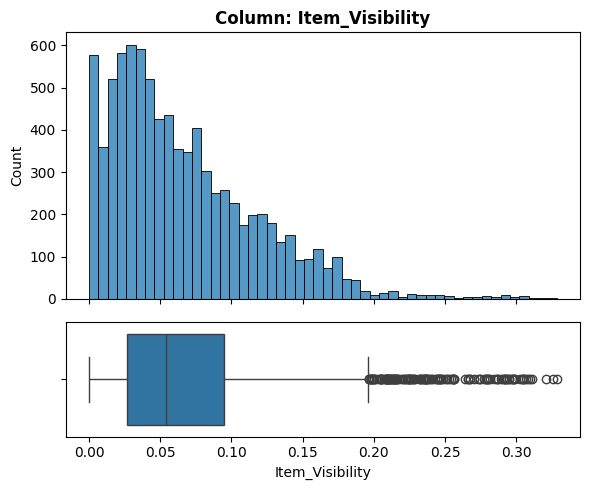

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [315]:
fig, ax = explore_numeric(df, 'Item_Visibility')

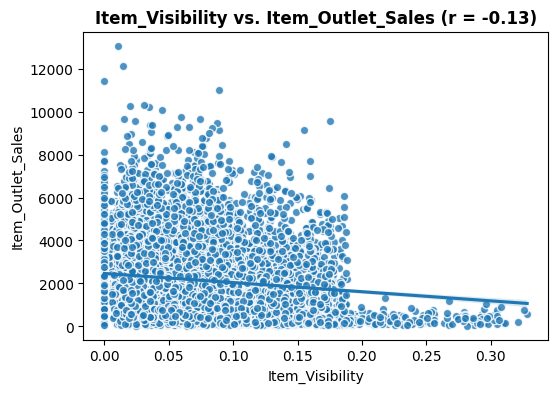

In [316]:
fig, ax = plot_numeric_vs_target(df, 'Item_Visibility')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expect when a product has more visibility to be selled more, meaning to acheive more sales.
- Does this feature appear to be a predictor of the target?
  - Not really, very week negative correlation. In other words, when the visibility increases, the item outlet sales decrease very slightly, as if almost it is not affected.


####Item_MRP
  - Definition: Maximum Retail Price (list price) of the product.
  - Feature Type: Numeric
  - NaN's Found: 0 (0.0%)
  - Unique Values: 5938
  - Most common value: '172.0422' occurs 7 times (0.08%)
  - Not constant or quasi-constant.
  - Would we know this feature before the target is determined?
    - Yes
  - Is there a business case/understanding reason to exclude based on our business case?
    - No

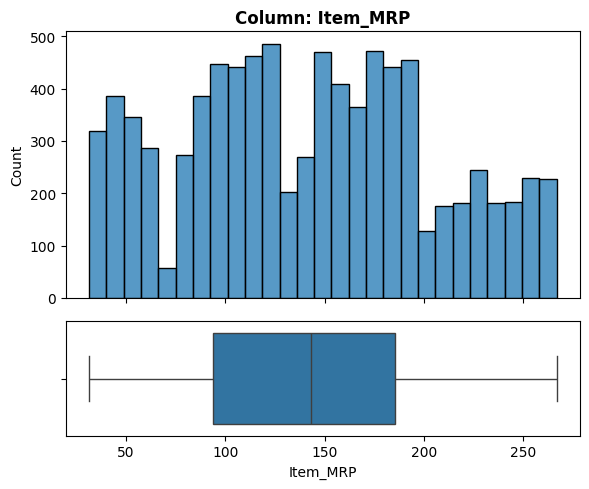

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [317]:
fig, ax = explore_numeric(df, 'Item_MRP')

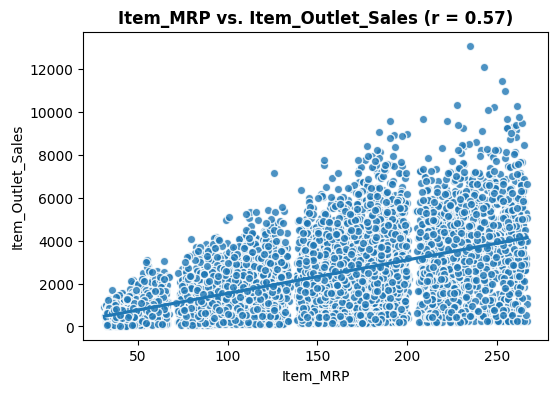

In [318]:
fig, ax = plot_numeric_vs_target(df, 'Item_MRP')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I expected when the item price increases it will achieve greater sales.
- Does this feature appear to be a predictor of the target?
  - Yes, very good predictor as it shows in the plot. when the item price increase the item outlet sales also increase.


####Item_Outlet_Sales
  - Definition: Sales of the product in the particular store. This is the target variable to be predicted.
  - Feature Type: Numeric
  - NaN's Found: 0 (0.0%)
  - Unique Values: 3493
  - Most common value: '958.752' occurs 17 times (0.2%)
  - Not constant or quasi-constant.
  - This is the target feature.

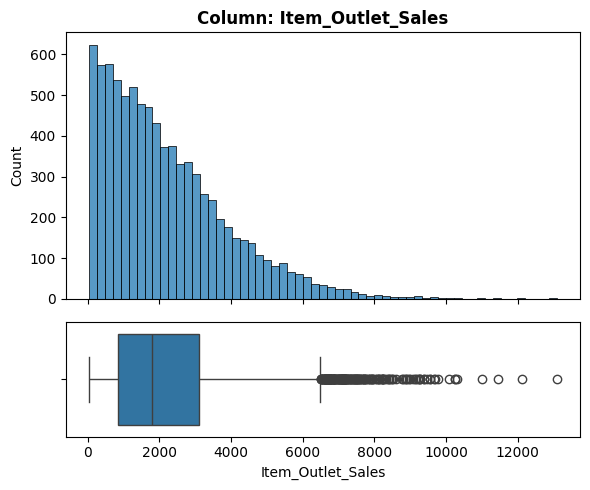

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [319]:
fig, ax = explore_numeric(df, 'Item_Outlet_Sales')